### Датасет для анализа: https://www.kaggle.com/pablollanderos33/world-cup-penalty-shootouts

Content

For each penalty registered the following:

    Kicking Team
    Where the shot was taken. To do this, divided the goal in 9 different zones.
    Whether the shooter was left or right footed.
    Where did the keeper dive.
    Whether the shot was on target or not.
    Whether the shot went in or not.
    The penalty number in each series.
    Whether or not the penalty was for elimination. This where the cases when, if the shot went in, the Game was over or the cases where a miss would end the game.

Notes

In the Zone column, I divided the goal into 9 different sections looking at it from the front: 
    
    1    Upper left corner
    2    Upper center
    3    Upper right corner
    4    Middle left area
    5    Middle center area
    6    Middle right area
    7    Bottom left corner
    8    Bottom center zone
    9    Bottom right corner
    
For the Keeper column, looking at it from the shooter's perspective:

    L  the keeper dived to the left   
    C  the keeper kept in the middle of the goal    
    R  the keeper dived to the right

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [2]:
df = pd.read_csv('WorldCupShootouts.xls')

In [3]:
df

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
...,...,...,...,...,...,...,...,...,...
299,30,CRO,7.0,R,L,1.0,1.0,6,0.0
300,30,RUS,7.0,R,R,1.0,1.0,7,0.0
301,30,CRO,4.0,R,R,1.0,1.0,8,0.0
302,30,RUS,7.0,R,R,1.0,1.0,9,1.0


Посмотрим общую информацию датасета и разберемся с пропущенными значениями при их наличии

In [4]:
df.describe()

,Game_id,Zone,OnTarget,Goal,Penalty_Number,Elimination
count,304.000000,279.000000,279.000000,279.000000,304.000000,280.000000
mean,15.368421,5.594982,0.917563,0.698925,5.578947,0.128571
std,8.703161,2.559531,0.275524,0.459550,2.939492,0.335324
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000,4.000000,1.000000,0.000000,3.000000,0.000000
50%,15.000000,6.000000,1.000000,1.000000,6.000000,0.000000
75%,23.000000,7.000000,1.000000,1.000000,8.000000,0.000000
max,30.000000,9.000000,1.000000,1.000000,12.000000,1.000000


In [5]:
df.isnull().sum()

Game_id            0
Team               0
Zone              25
Foot              25
Keeper            25
OnTarget          25
Goal              25
Penalty_Number     0
Elimination       24
dtype: int64

In [6]:
df.head(40)

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
5,1,GER,4.0,R,L,1.0,0.0,6,0.0
6,1,FRA,8.0,L,L,1.0,0.0,7,0.0
7,1,GER,3.0,R,R,1.0,1.0,8,0.0
8,1,FRA,9.0,R,L,1.0,1.0,9,0.0
9,1,GER,9.0,R,C,1.0,1.0,10,1.0


Значения NaN имеются в строках, указывающих на пенальти, которые должны были пробиваться (первая серия ударов 5 на 5), но не пробивались, т.к. результат победы одной из команд к этому моменту уже был определен

Удалим данные строки, они не несут необходимой информации

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         304 non-null    int64  
 1   Team            304 non-null    object 
 2   Zone            279 non-null    float64
 3   Foot            279 non-null    object 
 4   Keeper          279 non-null    object 
 5   OnTarget        279 non-null    float64
 6   Goal            279 non-null    float64
 7   Penalty_Number  304 non-null    int64  
 8   Elimination     280 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 21.5+ KB


Таких строк 25 по нескольких столбцам, но по столбцу Elimination 24, найдем эту строку и выясним причину

In [8]:
df[df.Zone.isnull() & df.Elimination.notnull()]

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
81,8,GER,NaN,NaN,NaN,NaN,NaN,10,0.0


In [9]:
df[df.Game_id == 8]

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
72,8,ENG,7.0,R,R,1.0,1.0,1,0.0
73,8,GER,7.0,R,L,1.0,1.0,2,0.0
74,8,ENG,6.0,R,R,1.0,1.0,3,0.0
75,8,GER,4.0,R,L,1.0,1.0,4,0.0
76,8,ENG,1.0,R,L,1.0,0.0,5,0.0
77,8,GER,6.0,R,R,1.0,1.0,6,0.0
78,8,ENG,8.0,L,L,1.0,0.0,7,0.0
79,8,GER,6.0,R,R,1.0,1.0,8,0.0
80,8,ENG,1.0,L,L,0.0,0.0,9,1.0
81,8,GER,NaN,NaN,NaN,NaN,NaN,10,0.0


Причина определена, неправильно закодировано значение по признаку Elimination, во всех остальнвх подобных случаях Elimination выставлен как NaN, здесь же 0, удалим все строки со значениями NaN

In [10]:
df = df.dropna()
df

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
...,...,...,...,...,...,...,...,...,...
299,30,CRO,7.0,R,L,1.0,1.0,6,0.0
300,30,RUS,7.0,R,R,1.0,1.0,7,0.0
301,30,CRO,4.0,R,R,1.0,1.0,8,0.0
302,30,RUS,7.0,R,R,1.0,1.0,9,1.0


In [11]:
df.Team.value_counts()

ARG    22
ITA    20
FRA    20
ENG    19
SPA    19
BRA    18
GER    18
HOL    12
IRE    10
CRA    10
CRO    10
RUS     9
MEX     7
SWE     6
RUM     6
CHI     5
DEN     5
URU     5
POR     5
PAR     5
BEL     5
COL     5
YUG     5
KOR     5
ROM     5
GHA     4
BUL     4
GRE     4
JAP     4
UKR     4
SWZ     3
Name: Team, dtype: int64

В целом, данные о названиях команд нам не нужны, но можно заметить, что чаще всего пробивали пенальти топовые мировые сборные, т.к. они, что неудивительно, гораздо чаще доходили до поздних этапов ЧМ, где и могло случиться такое событие, как серия пенальти

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         279 non-null    int64  
 1   Team            279 non-null    object 
 2   Zone            279 non-null    float64
 3   Foot            279 non-null    object 
 4   Keeper          279 non-null    object 
 5   OnTarget        279 non-null    float64
 6   Goal            279 non-null    float64
 7   Penalty_Number  279 non-null    int64  
 8   Elimination     279 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 21.8+ KB


In [13]:
# заменим названия столбцов на более удобные, объекты типа float заменим на int, т.к. nan-объекты удалены

df.columns = ['game_id', 'team', 'zone', 'foot', 'keeper', 'on_target', 'goal',
              'penalty_number', 'elimination']

new_type_columns = ['zone', 'on_target', 'goal', 'elimination']

for column in new_type_columns:
    df[column] = df[column].astype('int')
    
df

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,game_id,team,zone,foot,keeper,on_target,goal,penalty_number,elimination
0,1,FRA,7,R,R,1,1,1,0
1,1,GER,9,R,C,1,1,2,0
2,1,FRA,6,R,L,1,1,3,0
3,1,GER,2,R,C,1,1,4,0
4,1,FRA,9,R,L,1,1,5,0
...,...,...,...,...,...,...,...,...,...
299,30,CRO,7,R,L,1,1,6,0
300,30,RUS,7,R,R,1,1,7,0
301,30,CRO,4,R,R,1,1,8,0
302,30,RUS,7,R,R,1,1,9,1


In [14]:
df.keeper.value_counts()

L    127
R    114
C     36
l      2
Name: keeper, dtype: int64

In [15]:
# для целей анализа заменим некоторые строковые переменные на числовые
# foot: L - 1, R - 2
# keeper: L(l) - 1, C - 2, R - 3

df.foot[df.foot == 'L'] = 1
df.foot[df.foot == 'R'] = 2
df.keeper[df.keeper == 'L'] = 1
df.keeper[df.keeper == 'l'] = 1
df.keeper[df.keeper == 'C'] = 2
df.keeper[df.keeper == 'R'] = 3
df['foot'] = df['foot'].astype('int')
df['keeper'] = df['keeper'].astype('int')  

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\programdata\miniconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\programdata\miniconda3\lib\site-packages\ipykernel_

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   game_id         279 non-null    int64 
 1   team            279 non-null    object
 2   zone            279 non-null    int32 
 3   foot            279 non-null    int32 
 4   keeper          279 non-null    int32 
 5   on_target       279 non-null    int32 
 6   goal            279 non-null    int32 
 7   penalty_number  279 non-null    int64 
 8   elimination     279 non-null    int32 
dtypes: int32(6), int64(2), object(1)
memory usage: 15.3+ KB


In [17]:
# для дальнейших вычислений разобьем 9 категорий признака zone  на 3:
left = [1, 4, 7]
center = [2, 5, 8]
right = [3, 6, 9]
new_group = []
for i in df.zone:
    if i in left:
        new_group.append(1)
    elif i in center:
        new_group.append(2)
    else:
        new_group.append(3)

In [18]:
# введем 2 новых столбца:
# зоны удары объединим в 3 группы, как и зоны отражения голкипером
# разобьем пенальти на 2 группы - пробивают первыми (1) и пробивают вторыми (2)
df.insert(3, "grouped_zone", new_group, True) 
df['team_penalty_order'] = [1 if i % 2 != 0 else 2 for i in df.penalty_number]

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
df

,game_id,team,zone,grouped_zone,foot,keeper,on_target,goal,penalty_number,elimination,team_penalty_order
0,1,FRA,7,1,2,3,1,1,1,0,1
1,1,GER,9,3,2,2,1,1,2,0,2
2,1,FRA,6,3,2,1,1,1,3,0,1
3,1,GER,2,2,2,2,1,1,4,0,2
4,1,FRA,9,3,2,1,1,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
299,30,CRO,7,1,2,1,1,1,6,0,2
300,30,RUS,7,1,2,3,1,1,7,0,1
301,30,CRO,4,1,2,3,1,1,8,0,2
302,30,RUS,7,1,2,3,1,1,9,1,1


### Данные готовы для анализа, соберем некоторую статистику, рассмотрим корреляцию признаков

In [20]:
df.corr()

,game_id,zone,grouped_zone,foot,keeper,on_target,goal,penalty_number,elimination,team_penalty_order
game_id,1.000000,0.044906,-0.045740,0.060679,-0.042408,0.009874,-0.023087,-0.045351,-0.004860,-0.008427
zone,0.044906,1.000000,0.358464,-0.096952,0.061620,0.248329,-0.033706,0.054711,0.031723,0.010863
grouped_zone,-0.045740,0.358464,1.000000,-0.075089,0.183862,0.078993,0.065057,-0.014541,0.037818,-0.030385
foot,0.060679,-0.096952,-0.075089,1.000000,-0.048126,-0.020058,0.022234,0.007203,-0.020666,0.012458
keeper,-0.042408,0.061620,0.183862,-0.048126,1.000000,-0.087233,-0.012715,-0.039638,0.033686,0.055075
on_target,0.009874,0.248329,0.078993,-0.020058,-0.087233,1.000000,0.456690,-0.037269,-0.040129,0.051250
goal,-0.023087,-0.033706,0.065057,0.022234,-0.012715,0.456690,1.000000,-0.099889,-0.027067,0.000673
penalty_number,-0.045351,0.054711,-0.014541,0.007203,-0.039638,-0.037269,-0.099889,1.000000,0.552845,0.113078
elimination,-0.004860,0.031723,0.037818,-0.020666,0.033686,-0.040129,-0.027067,0.552845,1.000000,0.060767
team_penalty_order,-0.008427,0.010863,-0.030385,0.012458,0.055075,0.051250,0.000673,0.113078,0.060767,1.000000


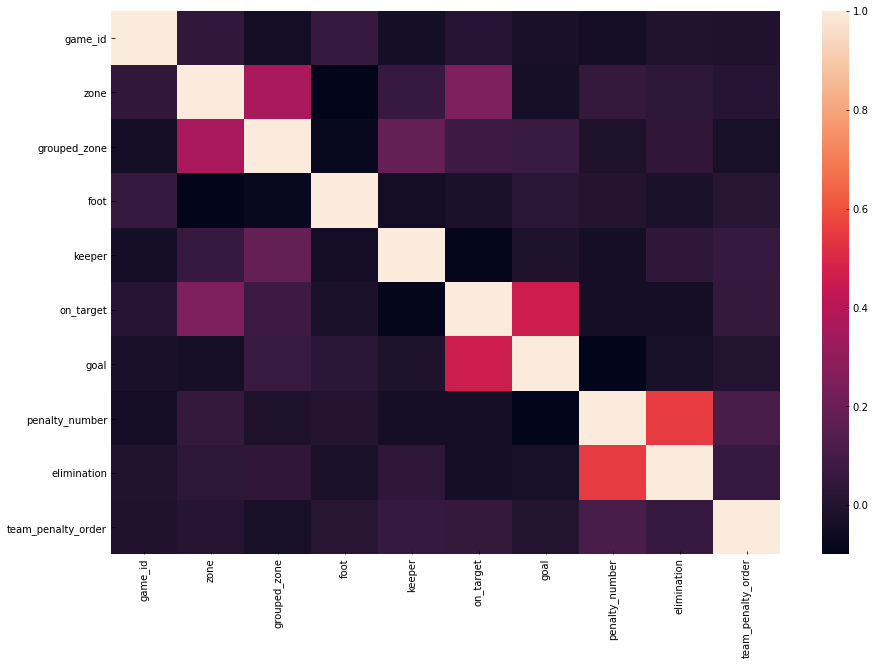

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())
plt.show()

Корреляция между признаками не предоставила нам интересных данных, grouped_zone создан на основе признака zone, показатель гола логично связан с показателем попадания в створ ворот, а показатель прекращения матча (elimination) связан с порядковым номером пенальти, т.к. с увеличением количества пробитых пенальти растет вероятность прекращения матча, а минимальным количеством пробитых пенальти для победы в матче будет 5 (при условии, что первая команда забьет первые три пенальти, а вторая все промажет, при аналогичной ситуации для победы второй команды необходимо пробить 6 пенальти)

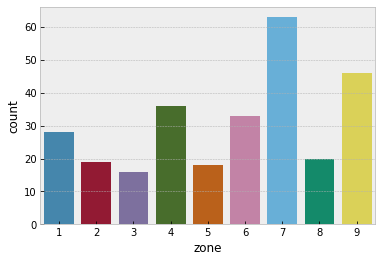

In [22]:
sns.countplot(df.zone)
plt.show()

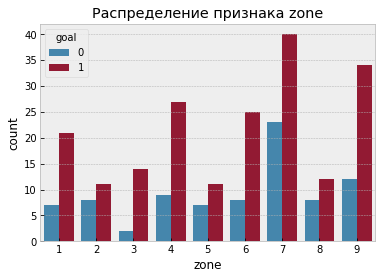

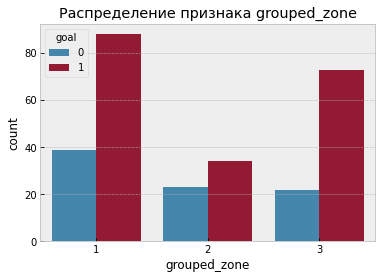

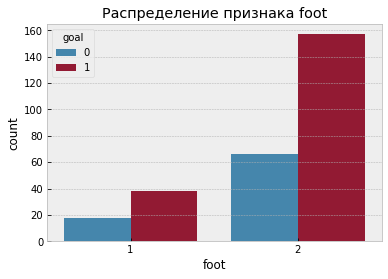

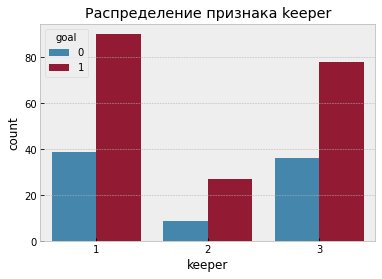

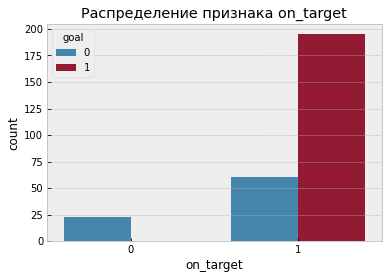

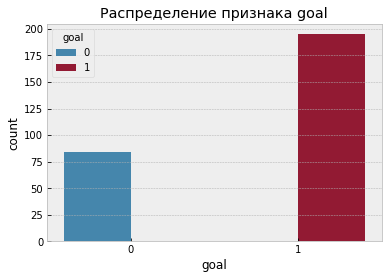

In [23]:
columns = ['zone', 'grouped_zone', 'foot', 'keeper', 'on_target', 'goal']

for i in columns:
    plt.figure()
    sns.countplot(df[i], hue=df.goal)
    plt.title('Распределение признака {}'.format(i))
    plt.show()

Основные выводы из статистики распределения:

Чаще всего пенальти бьют в нижние углы ворот, удары по центру наносятся реже всего

Левоногих футболистов в 4 раза меньше, чем правшей

Голкиперы редко выбирают центр ворот для отражения удара, в левый угол прыгают примерно с такой же частотой, с какой атакующие игроки наносят удар в этом направлении, однако имеется смещение статистики - вратари чаще выбирают правый угол, чем центр, примерно с такой же разницей, как и нападающие выбирают центр для удара, а не правый угол

Мимо створа ворот приходится менее 10 % ударов

Приводят к голу примерно каждые 2 удара из 3х

Также интересен тот факт, что удары по центру ворот приводят к голу лишь немногим более, чем в половине случаев, однако голкиперы отражают удары, оставаясь по центру ворот, не более, чем в трети случаев. Возможная причина - вратари, заваливаясь в какой-либо из углов ворот, часто отражают удар по центру при помощи ног, что и приводит к подобной статистической аномалии

Рассмотрим ситуации, в которых пенальти пробивался в том же направлении, в котором двигался голкипер, как часто забивались подобные мячи?

In [24]:
df[df.grouped_zone == df.keeper]

,game_id,team,zone,grouped_zone,foot,keeper,on_target,goal,penalty_number,elimination,team_penalty_order
3,1,GER,2,2,2,2,1,1,4,0,2
5,1,GER,4,1,2,1,1,0,6,0,2
7,1,GER,3,3,2,3,1,1,8,0,2
10,1,FRA,7,1,2,1,1,0,11,0,1
12,2,BRA,4,1,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
293,29,ENG,7,1,2,1,1,1,10,1,2
294,30,RUS,5,2,2,2,1,0,1,0,1
295,30,CRO,6,3,2,3,1,1,2,0,2
297,30,CRO,9,3,2,3,1,0,4,0,2


In [25]:
df[df.grouped_zone == df.keeper].goal.value_counts()

1    69
0    58
Name: goal, dtype: int64

In [26]:
print('При совпадении направления удара и движения голкипера пенальти забивают в ' + str(round(69/127*100, 2)) + '% случаев')

При совпадении направления удара и движения голкипера пенальти забивают в 54.33% случаев


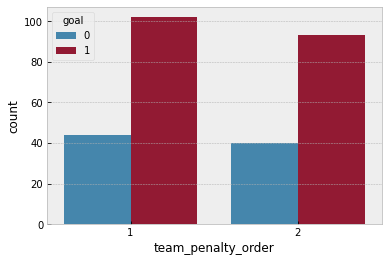

In [27]:
sns.countplot(df.team_penalty_order, hue=df.goal)

Команды, бьющие первыми, наносят больше, т.к. удар первой первой команды с большей вероятностью может завершить игру

Насколько чаще решающий удар завершается голом, если его наносит первая команда?

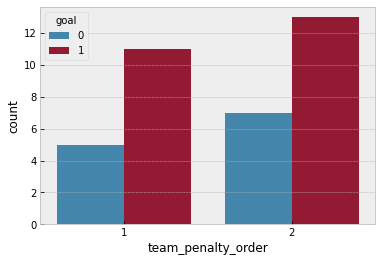

In [28]:
sns.countplot(data=df[df.elimination == 1], x='team_penalty_order', hue='goal')

Решающий удар первой команды привел к голу в 11 случаях, в 5 - промах, для второй команды этот показатель равен 13 и 7

In [29]:
print('Команда 1 в решающий момент забивает гол в {:.2f} раза чаще, чем не забивает, '
      'для второй команды этот показатель равен {:.2f}'.format(11/5, 13/7))


Команда 1 в решающий момент забивает гол в 2.20 раза чаще, чем не забивает, для второй команды этот показатель равен 1.86


Попробуем разобраться, является ли статистически значимым порядок командами пробития пенальти, приносит ли какое-либо преимущество очередность первой команде (забитый мяч первой командой психологически давит на вторую команду, т.к. необходимо отыгрываться

Гипотеза Н0 - разницы в порядке пробития пенальти нет

Гипотеза Н1 - разница есть

Примем p_value = 0.05

In [30]:
from scipy.stats import ttest_ind

In [31]:
data1 = np.array(df[df.team_penalty_order == 1].goal)
data2 = np.array(df[df.team_penalty_order == 2].goal)
stat, p = ttest_ind(data1, data2)

In [32]:
print(stat, p)

-0.01119855614720703 0.9910730927684397


In [33]:
from scipy.stats import mannwhitneyu


In [34]:

stat_2, p_2 = mannwhitneyu(data1, data2)

In [35]:
print(stat_2, p_2)

9703.0 0.4958974083014519


В обоих случаях расчетное значение p_value получилось достаточно большим и превышающим установленное нами, таким образом, можно судить, что различия в распределении забитых пенальти от порядка очередности пробития не являются статистически значимыми